In [34]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [16]:
# splitting the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [17]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# fitting the KNN classifier to the training data
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
# Predict the test result output
y_pred = classifier.predict(X_test)

In [29]:
# Evaluate the performance of KNN using confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


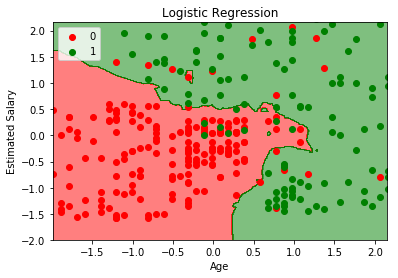

In [36]:
# Visualising the training set results
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01),
                     np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


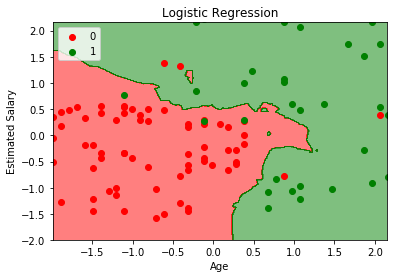

In [37]:
# Visualising the test set results
X1, X2 = np.meshgrid(np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01),
                     np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() # legend displayed with the labels
plt.show()